### 문제
## KNN 알고리즘을 사용하여 농구선수의 포지션(pos)을 예측해 보세요.
## - Pos: 플레이어의 포지션 ==> C : 센터(Center) or SG:슈팅가드(Shooting Guard)


### 속성 설명
 ========================================
#### Player : 이름
#### Pos: 플레이어의 포지션을 나타냅니다. 'SG' 는 '슈팅가드' 'C'는 '센터'를 의미
#### 3P : 3점슛 성공 횟수
#### 2P : 2점슛 성공 횟수
#### TRB: 리바운드 성공 횟수
#### AST: 어시스트 성공 횟수
#### STL: 스틸 성공 횟수
#### BLK: 블로킹 성공 횟수

### 1. 데이터를 로드 하세요.

In [1]:
import pandas as pd 
df = pd.read_csv('../data/basketball.csv') 
df.head()

,Player,Pos,3P,2P,TRB,AST,STL,BLK
0,Alex Abrines,SG,1.4,0.6,1.3,0.6,0.5,0.1
1,Steven Adams,C,0.0,4.7,7.7,1.1,1.1,1.0
2,Alexis Ajinca,C,0.0,2.3,4.5,0.3,0.5,0.6
3,Chris Andersen,C,0.0,0.8,2.6,0.4,0.4,0.6
4,Will Barton,SG,1.5,3.5,4.3,3.4,0.8,0.5


### 2. 수집된 데이터 확인

In [2]:
df.Pos.value_counts()

SG    50
C     50
Name: Pos, dtype: int64

### 3. 데이터 시각화

In [3]:
import warnings
warnings.filterwarnings(action = 'ignore')

from matplotlib import font_manager, rc 
font_name = font_manager.FontProperties(fname= "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

Text(0.5, 1.0, 'AST and 2P in 2d plane')

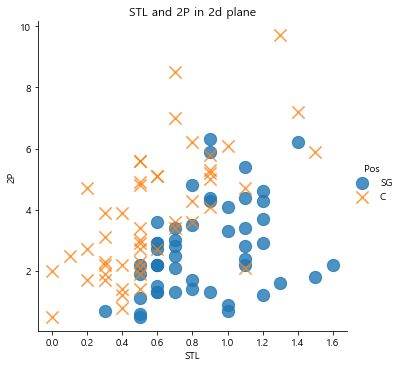

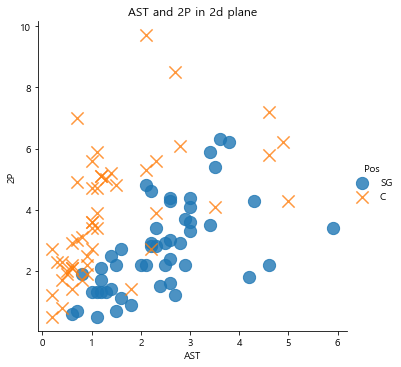

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#스틸, 2점슛 데이터 시각화
sns.lmplot('STL', '2P', data = df, fit_reg = False,
           scatter_kws={"s":150},
           markers=["o","x"],
           hue="Pos")

#타이틀
plt.title('STL and 2P in 2d plane')

#어시스트, 2점슛 데이터 시각화
sns.lmplot('AST', '2P', data = df, fit_reg = False,
           scatter_kws={"s":150},
           markers=["o","x"],
           hue="Pos")

#타이틀
plt.title('AST and 2P in 2d plane')

Text(0.5, 1.0, 'TRB and 3P in 2d plane')

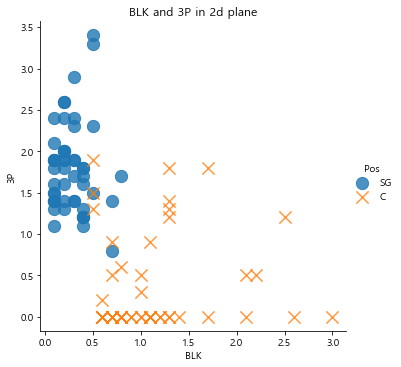

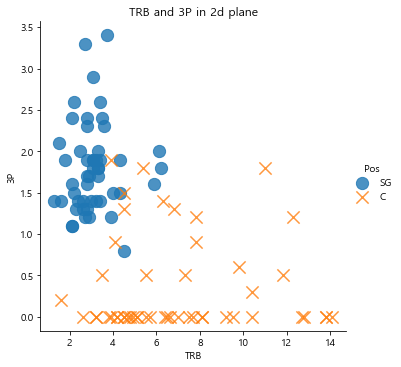

In [5]:
#블로킹, 3점슛 데이터 시각화
sns.lmplot('BLK', '3P', data = df, fit_reg = False,
           scatter_kws={"s":150},
           markers=["o","x"],
           hue="Pos")

#타이틀
plt.title('BLK and 3P in 2d plane')

#리바운드, 3점슛 데이터 시각화
sns.lmplot('TRB', '3P', data = df, fit_reg = False,
           scatter_kws={"s":150},
           markers=["o","x"],
           hue="Pos")

#타이틀
plt.title('TRB and 3P in 2d plane')

### 4. 분별력 없는 데이터 삭제

In [6]:
df.drop(['2P','AST','STL'], axis=1, inplace=True)
df.head()

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5


### 5. 데이터 나누기 - 80%는 학습데이터, 20%는 테스트 데이터

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

### 6. 학습 데이터와 테스트 데이터 개수를 확인하세요.

In [8]:
print(train.shape[0])
print(test.shape[0])

80
20


### 7. 모델을 knn 모델을 학습 시키고,

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score #k-fold 교차검증

In [10]:
train[['3P', 'BLK', 'TRB']].head()

,3P,BLK,TRB
23,0.5,2.2,11.8
65,2.3,0.5,3.6
67,1.1,0.1,2.1
53,0.0,1.7,13.8
34,3.3,0.5,2.7


In [11]:
train[['Pos']].values.ravel()

array(['C', 'SG', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG', 'SG', 'SG',
       'SG', 'C', 'SG', 'C', 'SG', 'C', 'SG', 'C', 'C', 'C', 'SG', 'C',
       'SG', 'C', 'C', 'C', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'SG', 'SG',
       'SG', 'C', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'C', 'SG', 'SG',
       'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'SG', 'SG',
       'SG', 'C', 'SG', 'SG', 'C', 'SG', 'SG', 'SG', 'C', 'SG', 'SG', 'C',
       'C', 'C', 'SG', 'C', 'C', 'C', 'SG', 'SG'], dtype=object)

In [72]:
#최적의 k를 찾기 위해 교차 검증을 수행할 k의 범위를 3부터 학습 데이터 절반까지 지정
max_k_range = train.shape[0]//2
k_list =[]
for i in range(3, max_k_range, 2): #홀수
    k_list.append(i)
    
cross_validation_scores = [] #각 k의 검증 결과 점수들
x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

#교차 검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train.values.ravel(), cv=10,
                             scoring='accuracy')
    cross_validation_scores.append(scores.mean())
cross_validation_scores

[0.9,
 0.875,
 0.9125,
 0.9125,
 0.9,
 0.875,
 0.875,
 0.875,
 0.875,
 0.85,
 0.8625,
 0.85,
 0.8375,
 0.8375,
 0.825,
 0.8375,
 0.8375,
 0.8125,
 0.8]

### 8. 예측 정확도를 출력하세요.

In [73]:
#모델 테스트
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=k)

x_train = train[['3P', 'BLK', 'TRB']]
y_train = train[['Pos']]

#knn모델 학습
knn.fit(x_train, y_train.values.ravel())

x_test = test[['3P', 'BLK', 'TRB']]
y_test = test[['Pos']]

#테스트 시작
pred = knn.predict(x_test)

#모델 예측 정확도 출력
print("accuracy:" + str(accuracy_score(y_test.values.ravel(),pred)))

accuracy:0.85


### 9. 정답과 예측값을 데이터 프레임으로 출력해 보세요.

In [74]:
comparison = pd.DataFrame({'실제값':y_test.values.ravel(), '예측값':pred })
comparison

,실제값,예측값
0,C,C
1,SG,SG
2,C,C
3,SG,SG
4,C,SG
5,C,C
6,C,C
7,SG,SG
8,SG,SG
9,SG,SG


In [76]:
comparison = pd.DataFrame({'실제값':y_test.values.ravel(), '예측값':pred, '예측결과':pred==y_test.values.ravel()})
comparison

,실제값,예측값,예측결과
0,C,C,True
1,SG,SG,True
2,C,C,True
3,SG,SG,True
4,C,SG,False
5,C,C,True
6,C,C,True
7,SG,SG,True
8,SG,SG,True
9,SG,SG,True
